In [1]:
import os

# For fast CPU-only startup 
os.environ['CUDA_VISIBLE_DEVICES'] = ''
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import time
from ML4transients.data_access import DatasetLoader
from ML4transients.training import PytorchDataset
import pandas as pd
import numpy as np

2026-01-05 13:46:23.326989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767617183.808618 3690393 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767617183.958431 3690393 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767617184.888534 3690393 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767617184.888576 3690393 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767617184.888578 3690393 computation_placer.cc:177] computation placer alr

In [2]:
dataset = DatasetLoader('/sps/lsst/groups/transients/HSC/fouchez/raphael/data/rc2_89570_r015')
dataset.get_dataset_statistics()

Discovering data files...
Data discovery completed in 0.00s: 40 cutout visits, 40 feature visits, 0 lightcurve paths
Computing dataset statistics...



DATASET STATISTICS SUMMARY

Data Overview:
  Total visits: 40
  Data paths: 1
  Visits with cutouts: 40
  Visits with features: 40

Cutout Statistics:
  Total cutouts: 90,231
  Average per visit: 2255.8

Feature Statistics:
  Total features: 68,821
  Average per visit: 1720.5

Label Distribution (Working Labels):
  Total labeled sources: 68,821
  Injections: 34,398 (50.0%)
  Real sources: 34,423 (50.0%)

Noise Perturbation Statistics:
  Ground Truth Distribution:
    True injections: 39,593
    True real sources: 29,228
  Label Noise:
    Mislabeled samples: 5,195 (injections labeled as real)
    Noise rate in 'real' class: 15.09%
    Overall noise rate: 7.55%
    Label agreement rate: 92.45%

Inference Results:
  Inference files: 0
  Models used: 0
  Visits with inference: 0



{'summary': {'num_visits': 40,
  'num_data_paths': 1,
  'total_cutouts': 90231,
  'total_features': 68821,
  'visits_with_cutouts': 40,
  'visits_with_features': 40,
  'avg_cutouts_per_visit': 2255.775,
  'avg_features_per_visit': 1720.525,
  'total_lightcurve_objects': 0},
 'per_visit': {},
 'labels': {'total_injections': 34398,
  'total_real': 34423,
  'total_labeled': 68821,
  'injection_pct': 49.98183693930632,
  'real_pct': 50.01816306069369},
 'noise': {'has_noise_perturbation': True,
  'ground_truth_injections': 39593,
  'ground_truth_real': 29228,
  'total_mislabeled': 5195,
  'noise_rate_in_real_class': 15.091653836097956,
  'noise_rate_overall': 7.5485680242949105,
  'label_agreement_rate': 92.45143197570509},
 'inference': {'total_inference_files': 0,
  'num_models': 0,
  'visits_with_inference': 0}}

# mag distrib


In [3]:
g = pd.read_csv("/sps/lsst/users/rbonnetguerrini/ML4transients/saved/injection_catalogs/89570inj/89570inj_bandg_gfrac0.125_seed42.csv")
r = pd.read_csv("/sps/lsst/users/rbonnetguerrini/ML4transients/saved/injection_catalogs/89570inj/89570inj_bandr_gfrac0.125_seed42.csv")
i = pd.read_csv("/sps/lsst/users/rbonnetguerrini/ML4transients/saved/injection_catalogs/89570inj/89570inj_bandi_gfrac0.125_seed42.csv")
z = pd.read_csv("/sps/lsst/users/rbonnetguerrini/ML4transients/saved/injection_catalogs/89570inj/89570inj_bandz_gfrac0.125_seed42.csv")
y = pd.read_csv("/sps/lsst/users/rbonnetguerrini/ML4transients/saved/injection_catalogs/89570inj/89570inj_bandy_gfrac0.125_seed42.csv")
print(g.columns)
print(len(g))
print(len(r))
print(len(i))
print(len(z))
print(len(y))
print(len(g)+len(r)+len(i)+len(z)+len(y))

Index(['injection_id', 'ra', 'dec', 'source_type', 'mag', 'host_magnitude',
       'visit', 'detector', 'parent_index', 'band'],
      dtype='object')
14979
28180
19044
18642
6128
86973


Band statistics:
g-band: mean = 25.314, median = 25.324, N = 14979
r-band: mean = 25.406, median = 25.418, N = 28180
i-band: mean = 24.601, median = 24.619, N = 19044
z-band: mean = 24.116, median = 24.169, N = 18642
y-band: mean = 22.867, median = 22.920, N = 6128

Overall: mean = 24.759, median = 24.822, N = 86973
49497


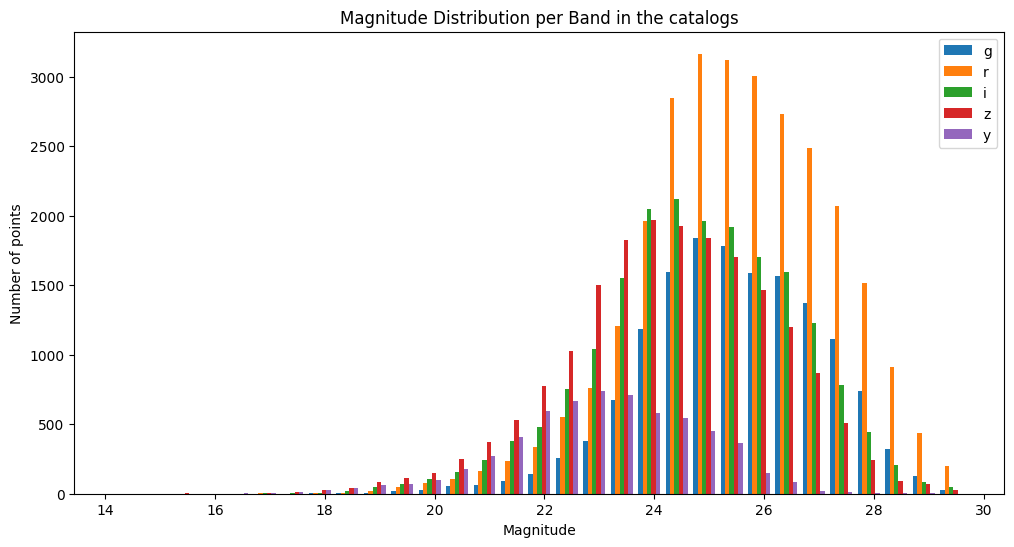

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

bands = {
    'g': g['mag'],
    'r': r['mag'],
    'i': i['mag'],
    'z': z['mag'],
    'y': y['mag']
}

# Choose magnitude bins
bins = np.arange(14, 30, 0.5)   # adjust to your data
discarded =  0
# Compute histogram counts for each band
hist_counts = {}
for b, mags in bands.items():
    hist_counts[b], _ = np.histogram(mags, bins=bins)
    for i in mags:
        if i>24.5:
            discarded = discarded + 1 
# Print mean and median for each band
print("Band statistics:")
for b, mags in bands.items():
    print(f"{b}-band: mean = {mags.mean():.3f}, median = {np.median(mags):.3f}, N = {len(mags)}")

# Compute overall mean and median
all_mags = np.hstack([mags.values for mags in bands.values()])
print(f"\nOverall: mean = {all_mags.mean():.3f}, median = {np.median(all_mags):.3f}, N = {len(all_mags)}")

# Plot grouped bars
plt.figure(figsize=(12,6))
bin_centers = 0.5 * (bins[:-1] + bins[1:])
width = 0.08  # smaller width to reduce overlap

for idx, (b, counts) in enumerate(hist_counts.items()):
    plt.bar(bin_centers + idx*width, counts, width=width, label=b)
print(discarded)
plt.xlabel("Magnitude")
plt.ylabel("Number of points")
plt.title("Magnitude Distribution per Band in the catalogs")
plt.legend()
plt.show()

In [9]:
import numpy as np
import astropy.units as u
import pandas as pd

# Bands of interest
bands = ['g', 'r', 'i', 'z', 'y']

# Dictionary to store magnitudes per band
matched_mags = {b: [] for b in bands}
non_pos = 0 
# Loop over all features in dataset
for key, loader in dataset.features.items():
    with pd.HDFStore(loader.file_path, "r") as store:
        features_df = store["features"]
        real = features_df[features_df['is_injection']==0]
        # Loop over each band
        for b in bands:
            # Select rows for this band
            band_fluxes = real.loc[real['band'] == b, 'psfFlux'].values
            
            # Filter out non-positive fluxes
            valid_fluxes = band_fluxes[band_fluxes > 0]
            non_pos = non_pos+len(band_fluxes[band_fluxes<0])
            # Convert to AB magnitude
            mags = (valid_fluxes * u.nJy).to(u.ABmag).value
            
            # Store magnitudes
            matched_mags[b].extend(mags)
print(non_pos)
# Print statistics per band
for b, mags in matched_mags.items():
    if len(mags) > 0:
        print(f"{b}-band: mean = {np.mean(mags):.3f}, median = {np.median(mags):.3f}, N = {len(mags)}")
    else:
        print(f"{b}-band: no matched points")


21037
g-band: mean = 25.191, median = 25.386, N = 2435
r-band: mean = 25.949, median = 25.904, N = 6716
i-band: mean = 24.941, median = 25.021, N = 5374
z-band: mean = 24.321, median = 24.484, N = 5365
y-band: mean = 22.762, median = 23.045, N = 2668


Band statistics:
g-band: mean = 24.430, median = 24.605, N = 8725
r-band: mean = 24.577, median = 24.741, N = 16693
i-band: mean = 23.740, median = 23.951, N = 11203
z-band: mean = 23.279, median = 23.482, N = 11263
y-band: mean = 22.046, median = 22.252, N = 3636

Overall: mean = 23.908, median = 24.127, N = 51520


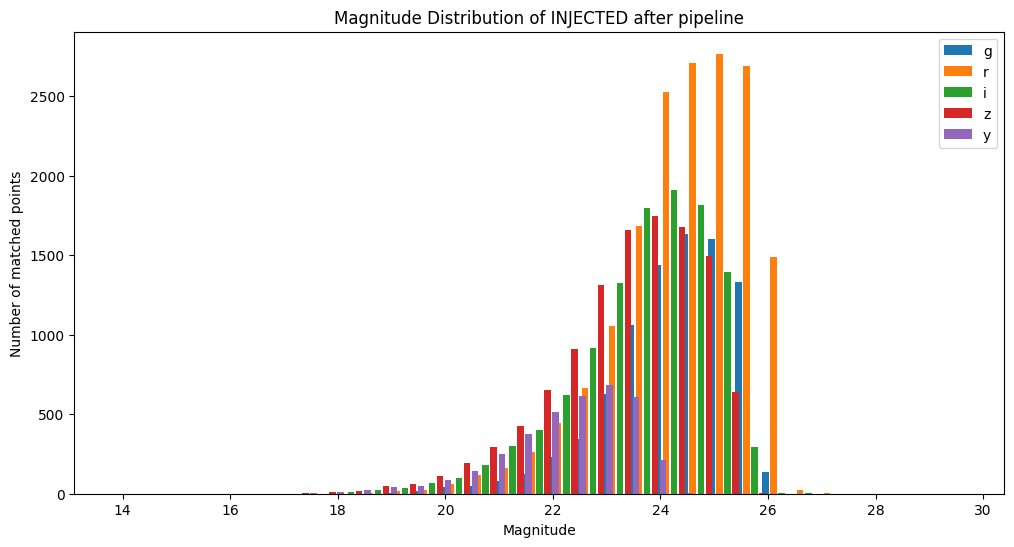

In [6]:
# Print mean and median for each band
print("Band statistics:")
for b, mags in matched_mags.items():
    if len(mags) > 0:
        print(f"{b}-band: mean = {np.mean(mags):.3f}, median = {np.median(mags):.3f}, N = {len(mags)}")
    else:
        print(f"{b}-band: no matched points")

# Print overall mean and median (all bands combined)
all_mags = np.hstack([mags for mags in matched_mags.values() if len(mags) > 0])
print(f"\nOverall: mean = {np.mean(all_mags):.3f}, median = {np.median(all_mags):.3f}, N = {len(all_mags)}")

# Plot histogram of matched magnitudes with centered grouped bars
plt.figure(figsize=(12,6))
bins = np.arange(14, 30, 0.5)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
width = 0.12
n_bands = len(matched_mags)
offsets = np.linspace(-width*n_bands/2, width*n_bands/2, n_bands)

for i, (b, mags) in enumerate(matched_mags.items()):
    counts, _ = np.histogram(mags, bins=bins)
    plt.bar(bin_centers + offsets[i], counts, width=width, label=b)

plt.xlabel("Magnitude")
plt.ylabel("Number of matched points")
plt.title("Magnitude Distribution of INJECTED after pipeline")
plt.legend()
plt.show()

Band statistics:
g-band: mean = 25.191, median = 25.386, N = 2435
r-band: mean = 25.949, median = 25.904, N = 6716
i-band: mean = 24.941, median = 25.021, N = 5374
z-band: mean = 24.321, median = 24.484, N = 5365
y-band: mean = 22.762, median = 23.045, N = 2668

Overall: mean = 24.863, median = 24.999, N = 22558


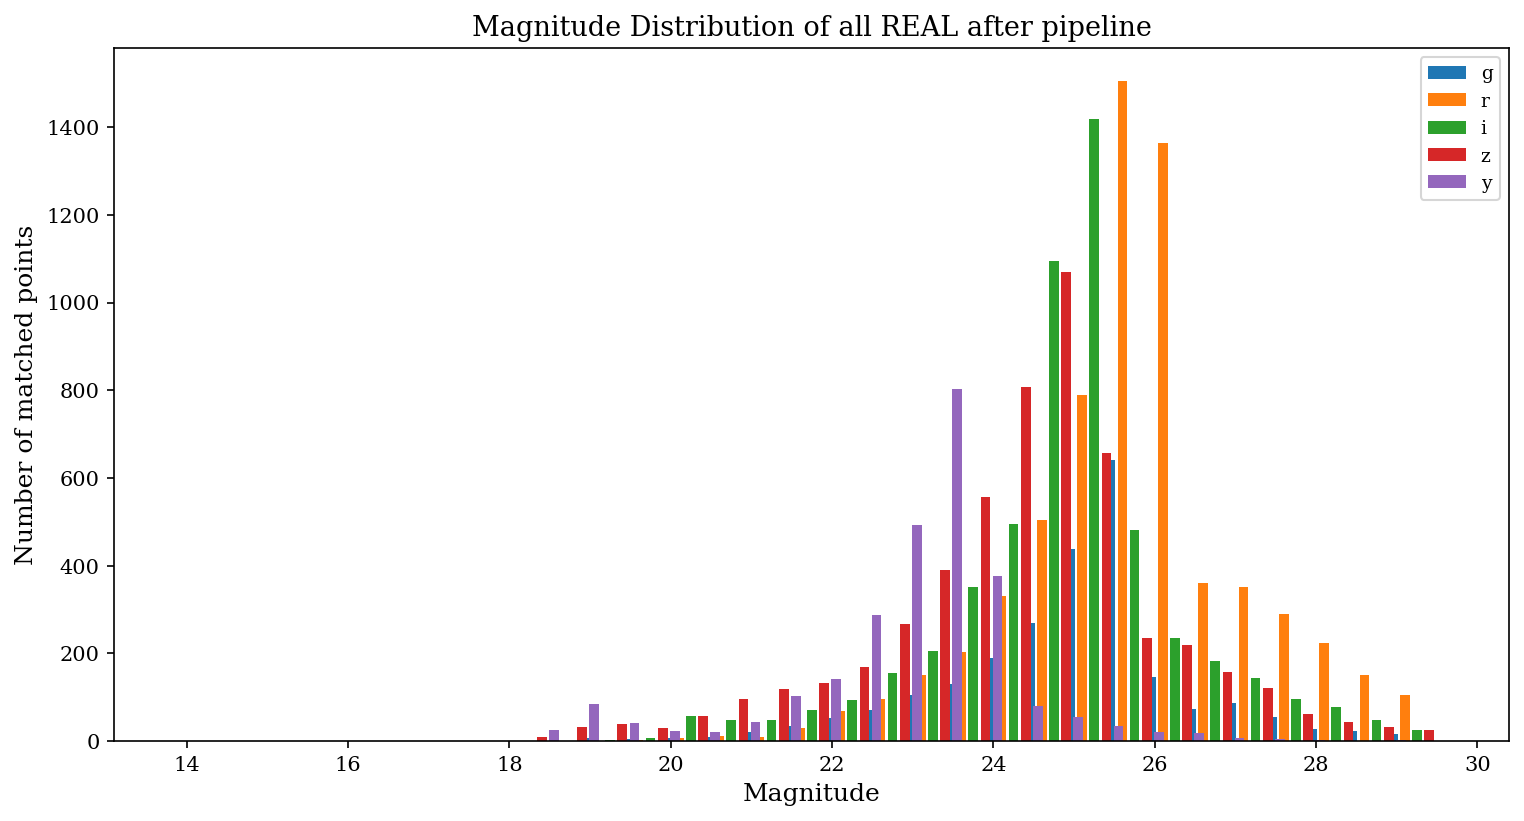

In [10]:

# Print mean and median for each band
print("Band statistics:")
for b, mags in matched_mags.items():
    if len(mags) > 0:
        print(f"{b}-band: mean = {np.mean(mags):.3f}, median = {np.median(mags):.3f}, N = {len(mags)}")
    else:
        print(f"{b}-band: no matched points")

# Print overall mean and median (all bands combined)
all_mags = np.hstack([mags for mags in matched_mags.values() if len(mags) > 0])
print(f"\nOverall: mean = {np.mean(all_mags):.3f}, median = {np.median(all_mags):.3f}, N = {len(all_mags)}")

# Plot histogram of matched magnitudes with centered grouped bars
plt.figure(figsize=(12,6))
bins = np.arange(14, 30, 0.5)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
width = 0.12
n_bands = len(matched_mags)
offsets = np.linspace(-width*n_bands/2, width*n_bands/2, n_bands)

for i, (b, mags) in enumerate(matched_mags.items()):
    counts, _ = np.histogram(mags, bins=bins)
    plt.bar(bin_centers + offsets[i], counts, width=width, label=b)

plt.xlabel("Magnitude")
plt.ylabel("Number of matched points")
plt.title("Magnitude Distribution of all REAL after pipeline")
plt.legend()
plt.show()

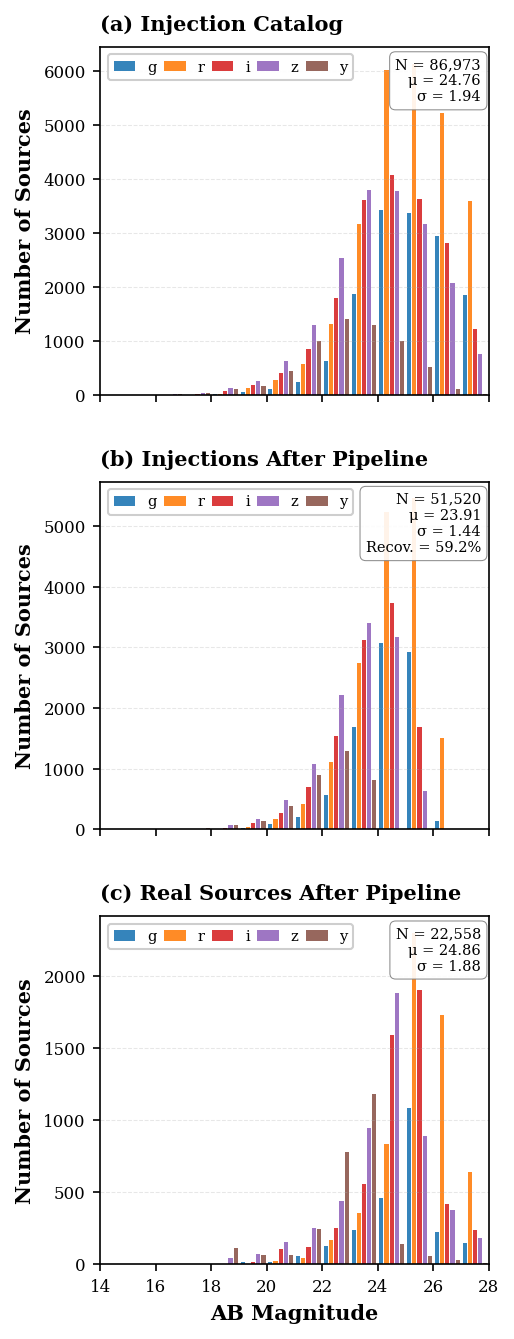


MAGNITUDE DISTRIBUTION COMPARISON

(a) INJECTION CATALOG:
  g-band: μ=25.314, σ=1.614, N=14,979
  r-band: μ=25.406, σ=1.791, N=28,180
  i-band: μ=24.601, σ=1.838, N=19,044
  z-band: μ=24.116, σ=1.907, N=18,642
  y-band: μ=22.867, σ=1.743, N=6,128
  Overall: μ=24.759, σ=1.938, N=86,973

(b) INJECTIONS AFTER PIPELINE:
  g-band: μ=24.430, σ=1.126, N=8,725
  r-band: μ=24.577, σ=1.216, N=16,693
  i-band: μ=23.740, σ=1.270, N=11,203
  z-band: μ=23.279, σ=1.338, N=11,263
  y-band: μ=22.046, σ=1.188, N=3,636
  Overall: μ=23.908, σ=1.437, N=51,520
  Recovery rate: 59.24%

(c) REAL SOURCES AFTER PIPELINE (with positive flux):
  g-band: μ=25.191, σ=1.589, N=2,435
  r-band: μ=25.949, σ=1.561, N=6,716
  i-band: μ=24.941, σ=1.532, N=5,374
  z-band: μ=24.321, σ=1.802, N=5,365
  y-band: μ=22.762, σ=1.418, N=2,668
  Overall: μ=24.863, σ=1.877, N=22,558
  Note: 22,558 real sources have positive flux (flux > 0)
        21,049 filtered out with negative/zero flux (48.3%)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from matplotlib import rcParams

# Set publication-quality defaults for single-column format
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 9
rcParams['axes.labelsize'] = 10
rcParams['axes.titlesize'] = 10
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['legend.fontsize'] = 7
rcParams['figure.dpi'] = 150

# More saturated, distinguishable colors for grizy bands
band_colors = {
    'g': '#1f77b4',  # Blue
    'r': '#ff7f0e',  # Orange
    'i': '#d62728',  # Red
    'z': '#9467bd',  # Purple
    'y': '#8c564b'   # Brown
}

# Load catalog data
g = pd.read_csv("/sps/lsst/users/rbonnetguerrini/ML4transients/saved/injection_catalogs/89570inj/89570inj_bandg_gfrac0.125_seed42.csv")
r = pd.read_csv("/sps/lsst/users/rbonnetguerrini/ML4transients/saved/injection_catalogs/89570inj/89570inj_bandr_gfrac0.125_seed42.csv")
i = pd.read_csv("/sps/lsst/users/rbonnetguerrini/ML4transients/saved/injection_catalogs/89570inj/89570inj_bandi_gfrac0.125_seed42.csv")
z = pd.read_csv("/sps/lsst/users/rbonnetguerrini/ML4transients/saved/injection_catalogs/89570inj/89570inj_bandz_gfrac0.125_seed42.csv")
y = pd.read_csv("/sps/lsst/users/rbonnetguerrini/ML4transients/saved/injection_catalogs/89570inj/89570inj_bandy_gfrac0.125_seed42.csv")

bands_catalog = {
    'g': g['mag'],
    'r': r['mag'],
    'i': i['mag'],
    'z': z['mag'],
    'y': y['mag']
}

bands_list = ['g', 'r', 'i', 'z', 'y']

# Load matched injections from pipeline
matched_injections = {b: [] for b in bands_list}

for key, loader in dataset.features.items():
    with pd.HDFStore(loader.file_path, "r") as store:
        features_df = store["features"]
        injected = features_df[features_df['is_injection'] == 1]
        for b in bands_list:
            band_fluxes = injected.loc[injected['band'] == b, 'psfFlux'].values
            valid_fluxes = band_fluxes[band_fluxes > 0]
            mags = (valid_fluxes * u.nJy).to(u.ABmag).value
            matched_injections[b].extend(mags)

# Load real sources from pipeline
matched_reals = {b: [] for b in bands_list}

for key, loader in dataset.features.items():
    with pd.HDFStore(loader.file_path, "r") as store:
        features_df = store["features"]
        reals = features_df[features_df['is_injection'] == 0]
        for b in bands_list:
            band_fluxes = reals.loc[reals['band'] == b, 'psfFlux'].values
            valid_fluxes = band_fluxes[band_fluxes > 0]
            mags = (valid_fluxes * u.nJy).to(u.ABmag).value
            matched_reals[b].extend(mags)

# Create VERTICAL three-panel comparison plot (single-column format)
fig, axes = plt.subplots(3, 1, figsize=(3.5, 9))

# LARGER bins: 1 magnitude instead of 0.5
bins = np.arange(14, 30, 1.0)  
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Wider bars to fill the larger bin space
n_bands = len(bands_list)
width = 0.15  # Wider bars (was 0.08)
offsets = np.linspace(-width*n_bands/2, width*n_bands/2, n_bands)

# Panel 1: Injection Catalog (before pipeline)
for idx, (b, mags) in enumerate(bands_catalog.items()):
    counts, _ = np.histogram(mags, bins=bins)
    axes[0].bar(bin_centers + offsets[idx], counts, width=width, 
                label=f'{b}', color=band_colors[b], alpha=0.9, 
                edgecolor='none')

all_cat_mags = np.hstack([mags.values for mags in bands_catalog.values()])
axes[0].set_ylabel('Number of Sources', fontweight='bold')
axes[0].set_title('(a) Injection Catalog', fontweight='bold', pad=8, loc='left')
axes[0].legend(loc='upper left', framealpha=0.95, ncol=5, columnspacing=0.5, handlelength=1.5)
axes[0].grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
axes[0].set_xlim(14, 28)
axes[0].tick_params(labelbottom=False)

textstr = f'N = {len(all_cat_mags):,}\nμ = {all_cat_mags.mean():.2f}\nσ = {all_cat_mags.std():.2f}'
axes[0].text(0.98, 0.97, textstr, transform=axes[0].transAxes, fontsize=7,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                      edgecolor='gray', linewidth=0.5, pad=0.4))

# Panel 2: Matched Injections (after pipeline)
for idx, (b, mags) in enumerate(matched_injections.items()):
    counts, _ = np.histogram(mags, bins=bins)
    axes[1].bar(bin_centers + offsets[idx], counts, width=width, 
                label=f'{b}', color=band_colors[b], alpha=0.9,
                edgecolor='none')

all_matched_inj = np.hstack([mags for mags in matched_injections.values() if len(mags) > 0])
recovery_rate = len(all_matched_inj) / len(all_cat_mags) * 100

axes[1].set_ylabel('Number of Sources', fontweight='bold')
axes[1].set_title('(b) Injections After Pipeline', fontweight='bold', pad=8, loc='left')
axes[1].legend(loc='upper left', framealpha=0.95, ncol=5, columnspacing=0.5, handlelength=1.5)
axes[1].grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
axes[1].set_xlim(14, 28)
axes[1].tick_params(labelbottom=False)

textstr = f'N = {len(all_matched_inj):,}\nμ = {all_matched_inj.mean():.2f}\nσ = {all_matched_inj.std():.2f}\nRecov. = {recovery_rate:.1f}%'
axes[1].text(0.98, 0.97, textstr, transform=axes[1].transAxes, fontsize=7,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                      edgecolor='gray', linewidth=0.5, pad=0.4))

# Panel 3: Real Sources (after pipeline)
for idx, (b, mags) in enumerate(matched_reals.items()):
    counts, _ = np.histogram(mags, bins=bins)
    axes[2].bar(bin_centers + offsets[idx], counts, width=width, 
                label=f'{b}', color=band_colors[b], alpha=0.9,
                edgecolor='none')

all_matched_real = np.hstack([mags for mags in matched_reals.values() if len(mags) > 0])

axes[2].set_xlabel('AB Magnitude', fontweight='bold')
axes[2].set_ylabel('Number of Sources', fontweight='bold')
axes[2].set_title('(c) Real Sources After Pipeline', fontweight='bold', pad=8, loc='left')
axes[2].legend(loc='upper left', framealpha=0.95, ncol=5, columnspacing=0.5, handlelength=1.5)
axes[2].grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
axes[2].set_xlim(14, 28)

textstr = f'N = {len(all_matched_real):,}\nμ = {all_matched_real.mean():.2f}\nσ = {all_matched_real.std():.2f}'
axes[2].text(0.98, 0.97, textstr, transform=axes[2].transAxes, fontsize=7,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                      edgecolor='gray', linewidth=0.5, pad=0.4))

plt.tight_layout()
plt.subplots_adjust(hspace=0.25)
plt.show()

# Print comprehensive statistics
print("\n" + "="*70)
print("MAGNITUDE DISTRIBUTION COMPARISON")
print("="*70)
print("\n(a) INJECTION CATALOG:")
for b, mags in bands_catalog.items():
    print(f"  {b}-band: μ={mags.mean():.3f}, σ={mags.std():.3f}, N={len(mags):,}")
print(f"  Overall: μ={all_cat_mags.mean():.3f}, σ={all_cat_mags.std():.3f}, N={len(all_cat_mags):,}")

print(f"\n(b) INJECTIONS AFTER PIPELINE:")
for b, mags in matched_injections.items():
    if len(mags) > 0:
        print(f"  {b}-band: μ={np.mean(mags):.3f}, σ={np.std(mags):.3f}, N={len(mags):,}")
print(f"  Overall: μ={all_matched_inj.mean():.3f}, σ={all_matched_inj.std():.3f}, N={len(all_matched_inj):,}")
print(f"  Recovery rate: {recovery_rate:.2f}%")

print(f"\n(c) REAL SOURCES AFTER PIPELINE (with positive flux):")
for b, mags in matched_reals.items():
    if len(mags) > 0:
        print(f"  {b}-band: μ={np.mean(mags):.3f}, σ={np.std(mags):.3f}, N={len(mags):,}")
print(f"  Overall: μ={all_matched_real.mean():.3f}, σ={all_matched_real.std():.3f}, N={len(all_matched_real):,}")
print(f"  Note: {len(all_matched_real):,} real sources have positive flux (flux > 0)")
print(f"        {43607 - len(all_matched_real):,} filtered out with negative/zero flux ({100*(43607 - len(all_matched_real))/43607:.1f}%)")
print("="*70)

In [16]:
# Save figure
fig.savefig('../final_plots/magnitude_comparison_single_column.png', dpi=600, bbox_inches='tight')
fig.savefig('../final_plots/magnitude_comparison_single_column.pdf', bbox_inches='tight')
print("\n Single-column figures saved as PNG (600 DPI) and PDF")


 Single-column figures saved as PNG (600 DPI) and PDF


# Cutout

In [2]:
def compute_xy(I0, R0, r, search_radius=200):
    """
    I0: initial number of injections
    R0: initial number of real sources
    r:  desired noise rate in the REAL class (fraction of former injections)
    search_radius: how far around the continuous solution to search for an integer one

    Returns:
        x_best: number of injections to relabel as real
        y_best: number of real samples to remove
        F_best: final size of each class (both equal to F_best)
        noise_best: actual achieved noise rate in the real class
    """

    # Continuous (ideal) solution from the formulas
    F_cont = I0 / (1 + r)
    x_cont = r * F_cont

    # Integer search around the continuous solution
    start_x = max(0, int(round(x_cont)) - search_radius)
    end_x   = min(I0, int(round(x_cont)) + search_radius)

    best = None  # (error, x, y, F, noise)

    for x in range(start_x, end_x + 1):
        F = I0 - x               # final injections
        if F <= 0:
            continue

        y = R0 + x - F           # from R0 + x - y = F  → y = R0 + x - F
        if y < 0:
            continue

        noise = x / F            # fraction of former injections in real
        error = abs(noise - r)

        if best is None or error < best[0]:
            best = (error, x, y, F, noise)

    if best is None:
        raise ValueError("No feasible integer solution found. Try another r.")

    _, x_best, y_best, F_best, noise_best = best
    return x_best, y_best, F_best, noise_best


# Example with your numbers:
I0 = 51550   # injections
R0 = 43607   # real sources

x, y, F, noise = compute_xy(I0, R0, 0.15)
print(f"relabeled injections --> real: {x}")
print(f"removed real samples:          {y}")
print(f"Final class size each:         {F}")
print(f"Noise in real:                 {noise:.6f}")
print('\n')
x, y, F, noise = compute_xy(I0, R0, 0.25)
print(f"relabeled injections --> real: {x}")
print(f"removed real samples:          {y}")
print(f"Final class size each:         {F}")
print(f"Noise in real:                 {noise:.6f}")
print('\n')
x, y, F, noise = compute_xy(I0, R0, 0.35)
print(f"relabeled injections --> real: {x}")
print(f"removed real samples:          {y}")
print(f"Final class size each:         {F}")
print(f"Noise in real:                 {noise:.6f}")

relabeled injections --> real: 6724
removed real samples:          5505
Final class size each:         44826
Noise in real:                 0.150002


relabeled injections --> real: 10310
removed real samples:          12677
Final class size each:         41240
Noise in real:                 0.250000


relabeled injections --> real: 13365
removed real samples:          18787
Final class size each:         38185
Noise in real:                 0.350007


Discovering data files...
Data discovery completed in 0.01s: 40 cutout visits, 40 feature visits, 0 lightcurve paths
Loading cutouts from visit 358


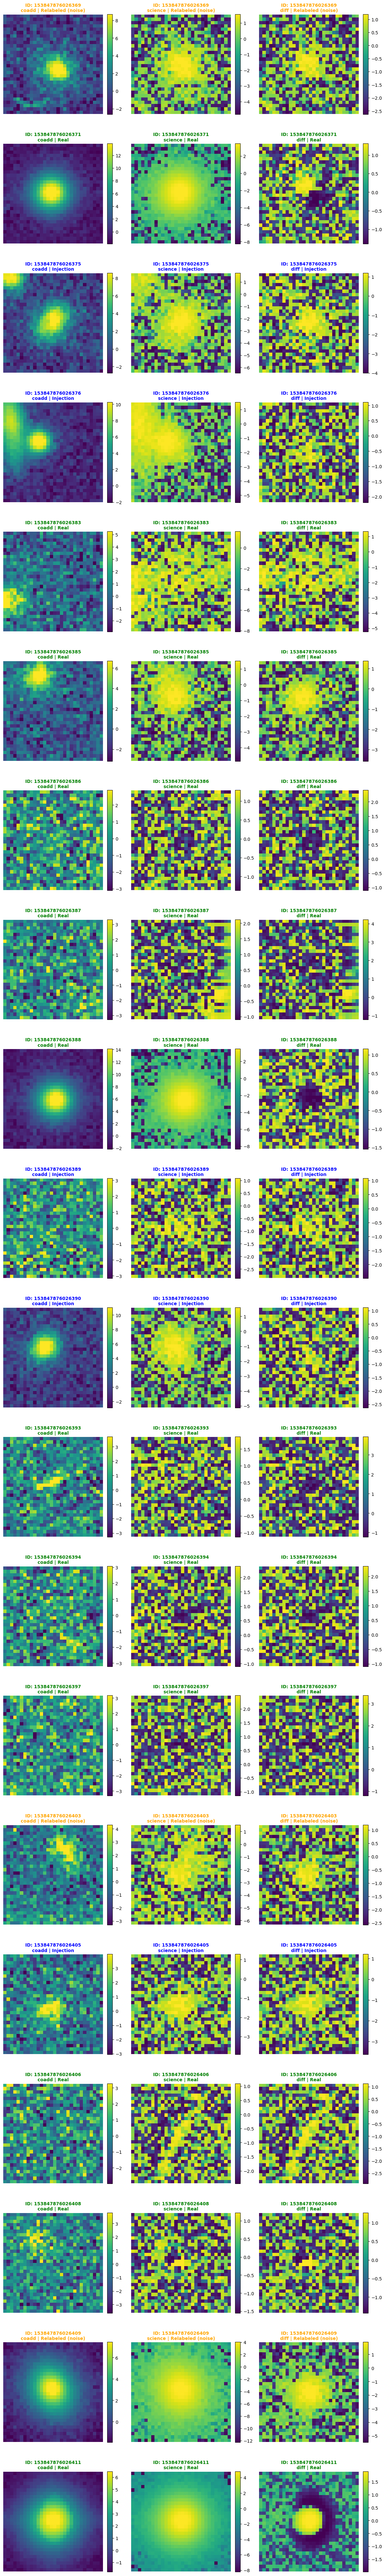


Last cutout shape: (30, 30)
Value range: [-1.987, 1.905]


In [3]:
import matplotlib.pyplot as plt

dataset2 = DatasetLoader('/sps/lsst/groups/transients/HSC/fouchez/raphael/data/rc2_89570_r015')

first_visit = dataset2.visits[2]
print(f"Loading cutouts from visit {first_visit}")

cutout_loader = dataset2.cutouts[first_visit]
feature_loader = dataset2.features[first_visit]
sample_ids = cutout_loader.ids[:20]

cutout_types = ['coadd', 'science', 'diff']

# rows = number of samples, columns = number of cutout types
n_rows = len(sample_ids)
n_cols = len(cutout_types)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))

for row_idx, dia_id in enumerate(sample_ids):
    features = feature_loader.get_by_id(dia_id)
    
    # Get the labels
    is_injection = int(features['is_injection'].iloc[0]) if not features.empty else 0
    spy_injected = int(features['spy_injected'].iloc[0]) if not features.empty else 0
    
    # Determine the status for display
    if spy_injected == 0:
        status = "Real"
        color = "green"
    elif is_injection == 1 and spy_injected == 1:
        status = "Injection"
        color = "blue"
    elif is_injection == 0 and spy_injected == 1:
        status = "Relabeled (noise)"
        color = "orange"
    else:
        status = "ERROR"
        color = "red"
    
    for col_idx, cutout_type in enumerate(cutout_types):
        ax = axes[row_idx, col_idx] if n_rows > 1 else axes[col_idx]

        # Load cutout of a specific type
        cutout = cutout_loader.get_by_id(dia_id, cutout_type=cutout_type)

        im = ax.imshow(cutout, origin='lower')
        
        # Better title with clearer information
        title = f'ID: {dia_id}\n{cutout_type} | {status}'
        ax.set_title(title, fontsize=10, color=color, weight='bold')

        ax.axis('off')
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    

plt.tight_layout()
plt.show()

# Optional diagnostics for last example
print(f"\nLast cutout shape: {cutout.shape}")
print(f"Value range: [{cutout.min():.3f}, {cutout.max():.3f}]")

# LC visualization

In [ ]:
dataset

Discovering data files...
Data discovery completed in 0.07s: 648 cutout visits, 648 feature visits, 1 lightcurve paths
Loaded lightcurve index with 3856539 objects
10 sources in the light curves 


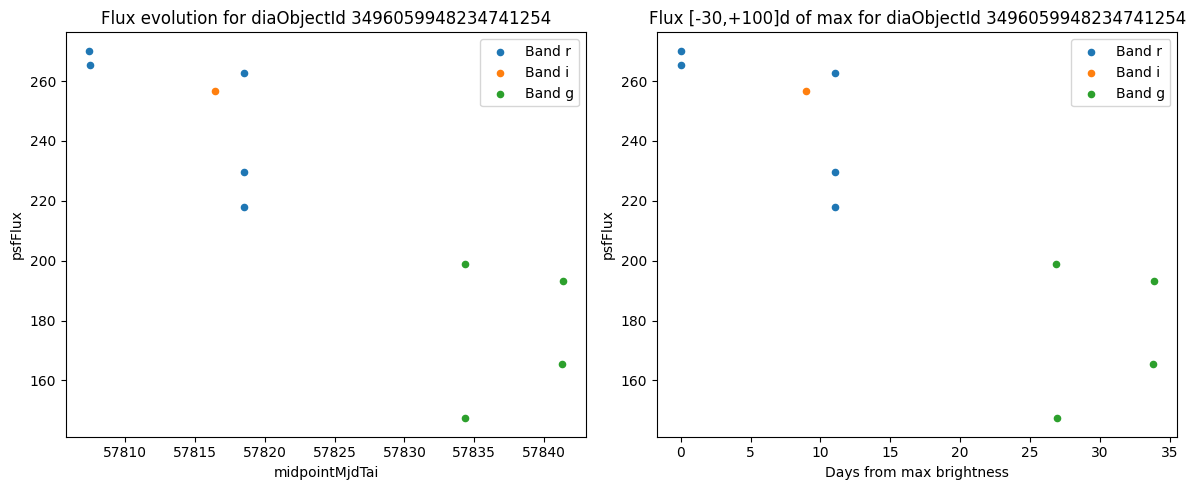

In [49]:
dataset.lightcurves.plot_lightcurve(dia_object_id=3496059948234741254)

In [50]:
data_path = dataset.data_paths[0]
diasource_index_file = data_path / "lightcurves" / "diasource_patch_index.h5"
data_path

PosixPath('/sps/lsst/groups/transients/HSC/fouchez/raphael/data/UDEEP_coadd')

In [51]:
diasource_index = pd.read_hdf(diasource_index_file, key='diasource_index')


In [52]:
dia_object_id=3496059948234741254
sources_for_object = diasource_index[diasource_index['diaObjectId'] == dia_object_id]
len(sources_for_object)
sources_for_object

,diaObjectId,tract,patch,patch_key,visit
diaSourceId,,,,,
44295902541644073,3496059948234741254,9813,59,9813_59,103134
44309646436991331,3496059948234741254,9813,59,9813_59,103166
44918670652080432,3496059948234741254,9813,59,9813_59,104584
45143729085874307,3496059948234741254,9813,59,9813_59,105108
45152306135564336,3496059948234741254,9813,59,9813_59,105128
45156603250344105,3496059948234741254,9813,59,9813_59,105138
45560328028684411,3496059948234741254,9813,59,9813_59,106078
45582659711140336,3496059948234741254,9813,59,9813_59,106130
46330870931390524,3496059948234741254,9813,59,9813_59,107872


In [53]:
sources_for_object.columns

Index(['diaObjectId', 'tract', 'patch', 'patch_key', 'visit'], dtype='object')

In [64]:
import matplotlib.pyplot as plt

def plot_lc_cutout(dia_object_id, cutout_type="diff"): 
    sources_for_object = diasource_index[diasource_index['diaObjectId'] == dia_object_id]
    len(sources_for_object)
    sources_for_object
    # number of sources
    n = len(sources_for_object.index)

    # create subplots (1 row, n columns)
    fig, axes = plt.subplots(1, n, figsize=(4*n, 4))  # adjust figsize as needed

    # ensure axes is iterable even if n=1
    if n == 1:
        axes = [axes]
    for ax, i in zip(axes, sources_for_object.index):
        img = dataset.get_cutout_by_id(i, cutout_type=cutout_type)
        
        # Handle None or invalid data
        if img is None or not isinstance(img, np.ndarray):
            ax.text(0.5, 0.5, 'No cutout\navailable', ha='center', va='center', transform=ax.transAxes)
            ax.axis('off')
            ax.set_title(str(i))
            continue
        
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(str(i))

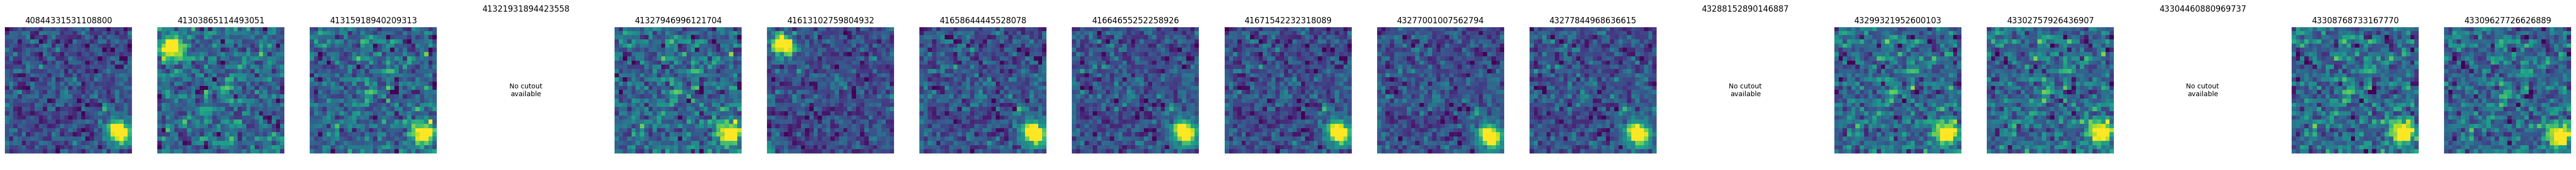

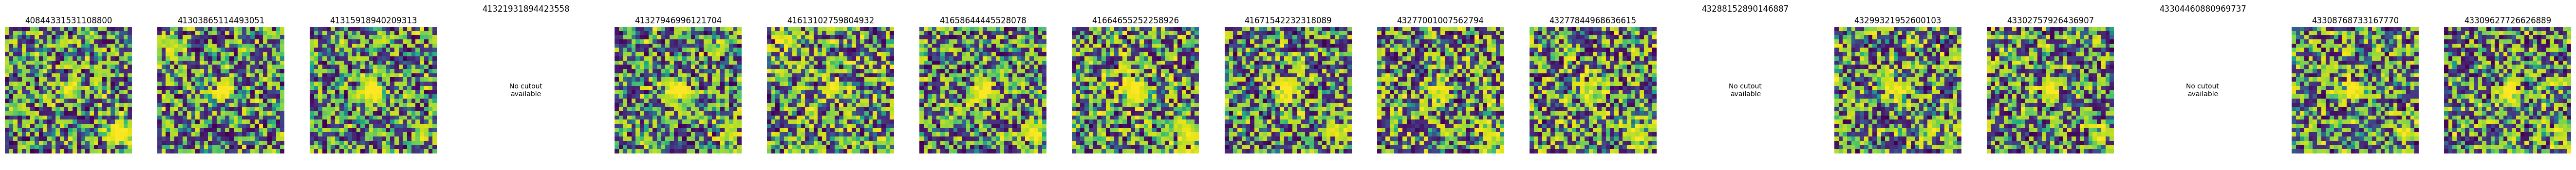

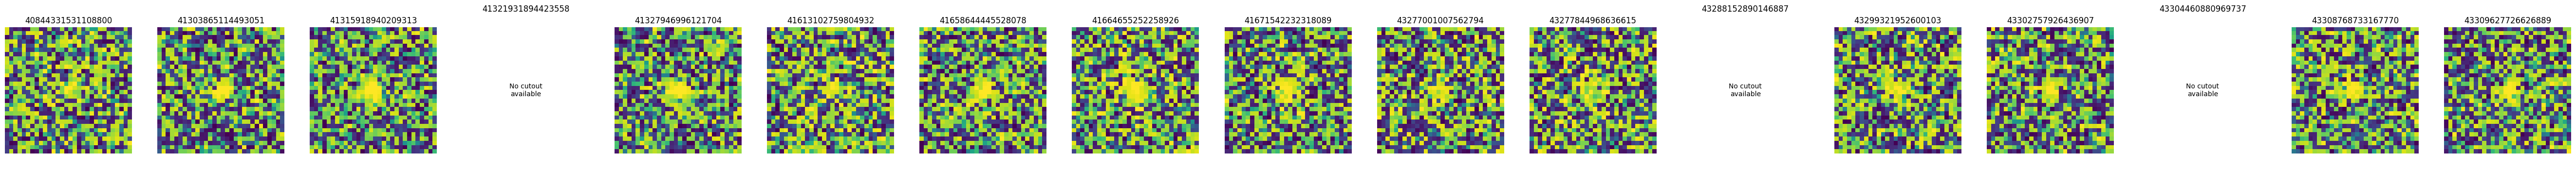

In [67]:
id=3495892822467315717
plot_lc_cutout(id, 'coadd')
plot_lc_cutout(id, 'science')
plot_lc_cutout(id, 'diff')

In [ ]:
plot_lc_cutout(sources_for_object, 'coadd')

In [ ]:
import matplotlib.pyplot as plt
for i in sources_for_object.index:
    plt.imshow(dataset.get_cutout_by_id(i, cutout_type='science'))
    plt.show()

# Lc inference

Discovering data files...
Data discovery completed in 0.01s: 648 cutout visits, 648 feature visits, 1 lightcurve paths

FILTERED LIGHTCURVES DATASET SUMMARY

Searching for metadata in: /sps/lsst/groups/transients/HSC/fouchez/raphael/data/UDEEP_coadd/lightcurves/extendedness_filtered
FILTERING PIPELINE STATISTICS
   Patch files processed: 79
   Objects kept: 283
   Objects rejected: 87
     |- Point source hosts: 62
     |- Low flux ratio: 25
   Overall keep rate: 76.5%

ANALYZING LIGHTCURVE CHARACTERISTICS...

DATASET COMPOSITION
   Total lightcurves: 283
   Total sources (observations): 5616
   Average sources per lightcurve: 19.8

LIGHTCURVE LENGTH (number of observations)
   Mean: 19.8
   Median: 14.0
   Std: 15.2
   Min: 10
   Max: 116
   25th percentile: 11.0
   75th percentile: 22.0

TIME SPAN (days)
   Mean: 61.9 days
   Median: 62.9 days
   Std: 31.9 days
   Min: 0.1 days
   Max: 126.7 days

MEAN PSF FLUX
   Mean: 17766.22
   Median: 998.85
   Std: 122133.95
   Min: 96.13
   Ma

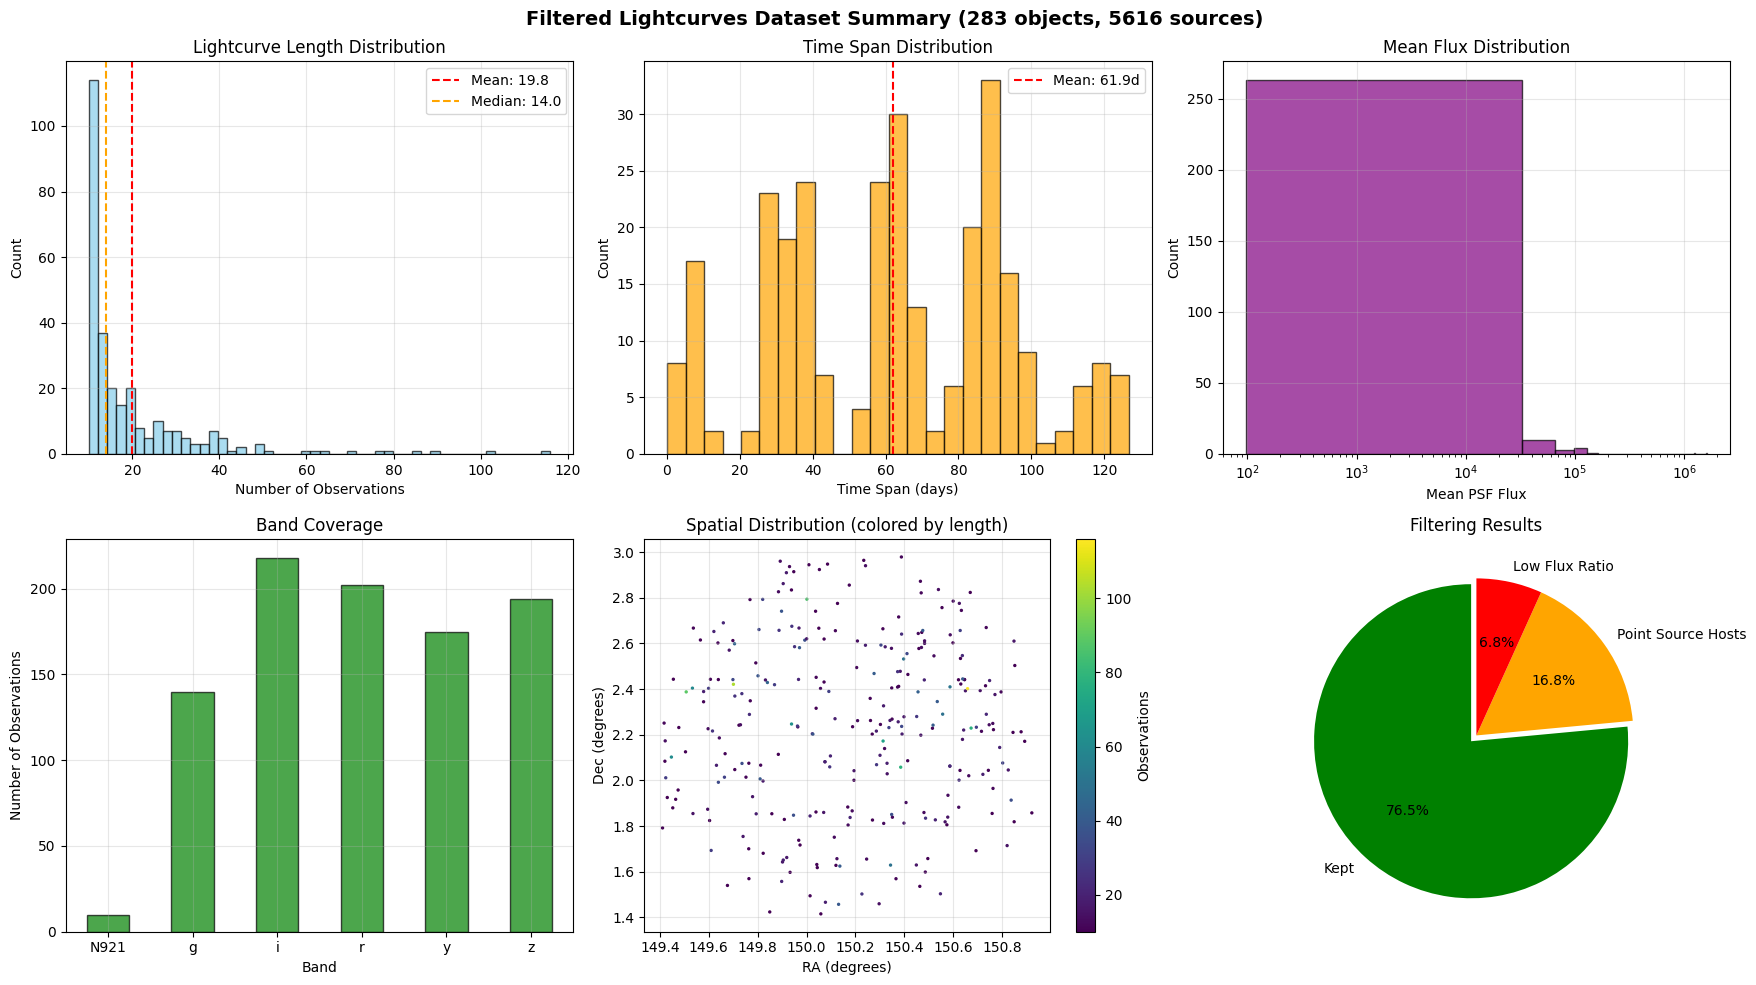

In [2]:
dataset3 = DatasetLoader('/sps/lsst/groups/transients/HSC/fouchez/raphael/data/UDEEP_coadd')
r = dataset3.lightcurves.get_filtered_lightcurves_summary()

In [3]:
dataset3.lightcurves.save_filtered_subset_dataset("/sps/lsst/groups/transients/HSC/fouchez/raphael/data/UDEEP_coadd_filtered")

Using filtered lightcurves from: /sps/lsst/groups/transients/HSC/fouchez/raphael/data/UDEEP_coadd/lightcurves/extendedness_filtered
Reading 79 filtered lightcurve patch files...
  Processed 10/79 patch files...
  Processed 20/79 patch files...
  Processed 30/79 patch files...
  Processed 40/79 patch files...
  Processed 50/79 patch files...
  Processed 60/79 patch files...

Filtered lightcurve summary:
  - Copied 64 patch files (skipped 15 empty)
  - Found 283 unique diaObjectIds

Mapping 283 diaObjectIds to diaSourceIds using parent lightcurve loader...
Mapping 283 diaObjectIds to their diaSourceIds...
Using diasource_index for mapping...
Found 5744 diaSourceIds for 283 objects

Grouping diaSourceIds by visit...
Mapped source IDs to 662 visits

Filtering features for 662 visits...
  Processed 10 visits, 133 samples so far...
  Processed 20 visits, 298 samples so far...
  Processed 30 visits, 423 samples so far...
  Processed 40 visits, 536 samples so far...
  Processed 50 visits, 654 

# Cross matching


## High conf


In [4]:
small_ds = DatasetLoader("/sps/lsst/groups/transients/HSC/fouchez/raphael/data/UDEEP_coadd_filtered")
small_ds.get_dataset_statistics()

Discovering data files...
Data discovery completed in 0.01s: 504 cutout visits, 504 feature visits, 0 lightcurve paths
Computing dataset statistics...

DATASET STATISTICS SUMMARY

Data Overview:
  Total visits: 504
  Data paths: 1
  Visits with cutouts: 504
  Visits with features: 504

Cutout Statistics:
  Total cutouts: 4,505
  Average per visit: 8.9

Feature Statistics:
  Total features: 4,505
  Average per visit: 8.9

Label Distribution:
  Total labeled sources: 4,505
  Injections: 0 (0.0%)
  Real sources: 4,505 (100.0%)

Inference Results:
  Inference files: 0
  Models used: 0
  Visits with inference: 0



{'summary': {'num_visits': 504,
  'num_data_paths': 1,
  'total_cutouts': 4505,
  'total_features': 4505,
  'visits_with_cutouts': 504,
  'visits_with_features': 504,
  'avg_cutouts_per_visit': 8.938492063492063,
  'avg_features_per_visit': 8.938492063492063,
  'total_lightcurve_objects': 0},
 'per_visit': {},
 'labels': {'total_injections': 0,
  'total_real': 4505,
  'total_labeled': 4505,
  'injection_pct': 0.0,
  'real_pct': 100.0},
 'inference': {'total_inference_files': 0,
  'num_models': 0,
  'visits_with_inference': 0}}

In [ ]:
small_ds = DatasetLoader("/sps/lsst/groups/transients/HSC/fouchez/raphael/data/UDEEP_coadd_filtered")
nogaia = small_ds.filter_by_crossmatch('source_cat_gaia', matched=False)
small_ds = DatasetLoader("/sps/lsst/groups/transients/HSC/fouchez/raphael/data/UDEEP_coadd_filtered")
agn = small_ds.filter_by_crossmatch('milliquas_filtered', matched=True)
print(f'Not a star: {len(nogaia)}, an agn {len(agn)}')

Loaded cross-match data for 283 objects
Loaded cross-match data for 283 objects
Not a star: 279, an agn 2


In [ ]:
transients =set(nogaia) - set(agn)

for x in transients:
    print(x)

3495809259583582208
3495901618560344064
3495906016606838787
3495892822467315717
3496055550188214296
3495906016606835742
3496086336513797153
3496015967769644066
3495963191211497507
3495954395118512164
3496068744327762982
3496059948234726439
3495971987304526890
3495853240048707626
3496055550188253230
3496046754095204400
3495971987304549426
3495826851769657398
3495963191211501629
3495888424420857919
3495826851769646143
3495853240048708674
3495949997071961155
3496143511118433352
3496024763862630474
3495914812699912270
3495971987304539225
3495945599025453146
3496007171676587106
3495949997071963237
3495936802932415595
3495888424420878447
3496029161909199984
3495914812699915377
3495954395118508150
3495879628327753849
3495901618560343162
3496068744327781508
3496002773630102662
3495971987304515719
3496007171676599432
3496011569723115655
3495888424420843659
3495963191211518092
3496051152141716619
3495989579490561167
3496086336513796240
3495857638095214736
3495884026374288530
3495866434188250258


In [ ]:
for i in nogaia:
    print(i)

3496029161909218091
3495976385351006424
3495976385351019030
3495906016606835778
3495906016606838787
3495906016606839883
3495906016606843127
3495888424420857919
3495888424420867657
3495888424420887788
3495967589258005654
3495967589258009422
3495967589258014460
3495967589258016524
3495892822467314205
3495892822467320562
3496112724792855090
3496112724792857537
3495985181444042443
3495985181444044505
3495985181444047538
3495945599025457065
3495945599025463841
3496046754095203202
3496090734560315335
3496090734560319202
3496090734560320819
3496086336513793850
3496086336513793860
3496086336513797153
3496095132606818918
3496095132606821418
3496095132606825171
3496095132606827313
3495862036141715830
3495862036141729733
3495928006839402923
3496143511118432745
3496143511118433352
3495897220513822327
3495897220513822626
3496068744327776980
3496068744327781295
3495971987304537630
3495971987304543597
3495818055676621387
3495963191211497507
3496007171676610077
3495853240048708674
3495923608792933337


In [ ]:
for i in agn:
    print(i)

3495976385351025819
3495906016606839094
3495888424420898774
3495985181444047538
3495945599025457461
3495945599025479796
3496046754095217818
3496046754095217938
3496090734560319202
3496095132606820418
3495971987304562553
3496007171676619078
3495923608792948168
3496099530653325421
3495949997071967555
3495949997071971839
3495949997071973741
3495936802932425393
3495910414653355215
3495910414653359589
3495954395118469515
3496103928699850834
3495901618560353722


## Udeep

In [ ]:
gaia_stars = dataset.filter_by_crossmatch('source_cat_gaia', matched=True)
transient_candidates = dataset.filter_by_crossmatch('source_cat_gaia', matched=False)

In [ ]:
for i in gaia_stars:
    print(i)